<h1>Sudoku Solver</h1>
<p>En este cuaderno se realizan los experimentos para comparar los algoritmos de búsqueda de costo uniforme y A*.</p>

Primero instalamos la libreria py-sudoku, que nos permitirá generar sudokus de diversos niveles de dificultad.

In [1]:
!pip install py-sudoku


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Veamos una prueba de la librería:

In [8]:
from sudoku import Sudoku
import time

Creamos un Sudoku de tamaño 9x9 con la mitad de pistas.

In [9]:
puzzle = Sudoku(3,seed=int(time.time() * 1000)).difficulty(0.6)
puzzle.show()

Puzzle has multiple solutions
+-------+-------+-------+
| 2 3   |       |       |
| 7 8 5 | 2 9   |   3   |
|       |       |   5   |
+-------+-------+-------+
| 5     |   6 9 | 4     |
| 4     | 8 5   | 3 7   |
|     8 | 7     |       |
+-------+-------+-------+
|   4 2 | 6     |   8 5 |
| 8 1 6 |     5 | 7 4   |
|       |   8 3 |       |
+-------+-------+-------+



Vemos la solución

In [10]:
solution = puzzle.solve()
solution.show()

Puzzle has exactly one solution
+-------+-------+-------+
| 2 3 1 | 5 4 8 | 6 9 7 |
| 7 8 5 | 2 9 6 | 1 3 4 |
| 6 9 4 | 3 1 7 | 8 5 2 |
+-------+-------+-------+
| 5 7 3 | 1 6 9 | 4 2 8 |
| 4 6 9 | 8 5 2 | 3 7 1 |
| 1 2 8 | 7 3 4 | 5 6 9 |
+-------+-------+-------+
| 3 4 2 | 6 7 1 | 9 8 5 |
| 8 1 6 | 9 2 5 | 7 4 3 |
| 9 5 7 | 4 8 3 | 2 1 6 |
+-------+-------+-------+



Ahora carguemos algunas librerías y los scripts del proyecto

In [11]:
import sys, os, statistics, random
from src import SudokuProblem, aStarSearch, aStarSearchInstrumentado, sudokuHeuristic, uniformCostSearch, uniformCostSearchInstrumentado, blankHeuristic
import tools
from tools import imprimir_sudoku, aplicar_acciones, transformar_tablero

Vemos el sudoku inicial en forma de matriz.

In [12]:
A = transformar_tablero(puzzle.board)
A

[[2, 3, 0, 0, 0, 0, 0, 0, 0],
 [7, 8, 5, 2, 9, 0, 0, 3, 0],
 [0, 0, 0, 0, 0, 0, 0, 5, 0],
 [5, 0, 0, 0, 6, 9, 4, 0, 0],
 [4, 0, 0, 8, 5, 0, 3, 7, 0],
 [0, 0, 8, 7, 0, 0, 0, 0, 0],
 [0, 4, 2, 6, 0, 0, 0, 8, 5],
 [8, 1, 6, 0, 0, 5, 7, 4, 0],
 [0, 0, 0, 0, 8, 3, 0, 0, 0]]

Ahora solucionemos el sudoku con nuestro algoritmo A*.

In [13]:
problem = SudokuProblem(A)
solucion_astar, stats_astar = aStarSearchInstrumentado(problem, sudokuHeuristic)

In [14]:
if solucion_astar:
    print("SOLUCIÓN ENCONTRADA POR A*:")
    estado_final = aplicar_acciones(A, solucion_astar)
    imprimir_sudoku(estado_final)

SOLUCIÓN ENCONTRADA POR A*:
2 3 1 | 5 4 8 | 6 9 7 
7 8 5 | 2 9 6 | 1 3 4 
6 9 4 | 3 1 7 | 8 5 2 
---------------------
5 7 3 | 1 6 9 | 4 2 8 
4 6 9 | 8 5 2 | 3 7 1 
1 2 8 | 7 3 4 | 5 6 9 
---------------------
3 4 2 | 6 7 1 | 9 8 5 
8 1 6 | 9 2 5 | 7 4 3 
9 5 7 | 4 8 3 | 2 1 6 


Con el siguiente código podemos ver paso a paso cómo el algoritmo resuelve el problema:

In [16]:
from IPython.display import clear_output

def solucionPaso_a_Paso(tablero_inicial, acciones, delay=0.5):
    """Muestra el tablero paso a paso aplicando cada acción."""
    tablero = [row[:] for row in tablero_inicial]  # Copia profunda
    for i, accion in enumerate(acciones):
        fila, columna, valor = accion
        tablero[fila][columna] = valor
        clear_output(wait=True)
        print(f"Paso {i+1}/{len(acciones)}: Coloca {valor} en ({fila},{columna})")
        imprimir_sudoku(tablero)
        time.sleep(delay)

In [18]:
solucionPaso_a_Paso(A,solucion_astar)

Paso 48/48: Coloca 1 en (6,5)
2 3 1 | 5 4 8 | 6 9 7 
7 8 5 | 2 9 6 | 1 3 4 
6 9 4 | 3 1 7 | 8 5 2 
---------------------
5 7 3 | 1 6 9 | 4 2 8 
4 6 9 | 8 5 2 | 3 7 1 
1 2 8 | 7 3 4 | 5 6 9 
---------------------
3 4 2 | 6 7 1 | 9 8 5 
8 1 6 | 9 2 5 | 7 4 3 
9 5 7 | 4 8 3 | 2 1 6 


<h2>Experimentos</h2>
Primero realicemos una prueba para observar el comportamiento asintótico temporal y de nodos explorados entre el algoritmo de costo uniforme y el algoritmo A*

In [6]:
tiemposC=[]
tiemposA=[]
tiemposBlank=[]
nodosExpandidosC=[]
nodosExpandidosA=[]
nodosExpandidosBlank=[]


## 0.6, 0.65, 0.75, 0.8, 0.85, 0.9, 0.96, 1
for i in range(8):
    dificultad = 0.6 + (i*0.05)
    print("="*50,end="\n")
    print("Empezando dificultad: ",dificultad, end="\n")
    if dificultad < 0.75:
        numIteraciones = 20
    else:
        numIteraciones = 10
    for iteraciones in range(numIteraciones):
        tiemposCtemp = [];tiemposAtemp = []; tiemposBtemp = []
        nodosExpCtemp = []; nodosExpAtemp = []; nodosExpBtemp = []
        T = Sudoku(3,seed=int(time.time() * 1000)).difficulty(dificultad)
        T = transformar_tablero(T.board)
        problem = SudokuProblem(T)
        _, statsA = aStarSearchInstrumentado(problem,sudokuHeuristic)
        tA = statsA['tiempo_fin']-statsA['tiempo_inicio']
        tiemposAtemp.append(tA)
        nodosExpAtemp.append(statsA['nodos_expandidos'])
        print("A* con heurística sudoku terminado en:",tA,end="\n")
        if dificultad>0.75: # Se vuelve insostenible para Costo Uniforme
            tiemposCtemp.append(9999)
            tiemposBtemp.append(9999)
            nodosExpBtemp.append(sys.maxsize//2)
            nodosExpCtemp.append(sys.maxsize//2)
            print("Costo Uniforme y A* con heurística blank saltados por dificultad alta")
            continue
        _, statsB = aStarSearchInstrumentado(problem,blankHeuristic)
        tB = statsB['tiempo_fin']-statsB['tiempo_inicio']
        tiemposBtemp.append(tB)
        nodosExpBtemp.append(statsB['nodos_expandidos'])
        print("A* con heurística blank terminado en:",tB,end="\n")
        _, statsC = uniformCostSearchInstrumentado(problem)
        tC = statsC['tiempo_fin']-statsC['tiempo_inicio']
        tiemposCtemp.append(tC)
        nodosExpCtemp.append(statsC['nodos_expandidos'])
        print("Costo Uniforme terminado en:",tC,end="\n")
        
    tiemposC.append(statistics.median(tiemposCtemp))
    tiemposA.append(statistics.median(tiemposAtemp))
    tiemposBlank.append(statistics.median(tiemposBtemp))
    nodosExpandidosC.append(statistics.median(nodosExpCtemp))
    nodosExpandidosA.append(statistics.median(nodosExpAtemp))
    nodosExpandidosBlank.append(statistics.median(nodosExpBtemp))
        

Empezando dificultad:  0.6
A* con heurística sudoku terminado en: 0.007594585418701172
A* con heurística blank terminado en: 0.0055921077728271484
Costo Uniforme terminado en: 0.004482269287109375
A* con heurística sudoku terminado en: 0.013053178787231445
A* con heurística blank terminado en: 0.09864020347595215
Costo Uniforme terminado en: 0.08759665489196777
A* con heurística sudoku terminado en: 0.007128238677978516
A* con heurística blank terminado en: 0.05489087104797363
Costo Uniforme terminado en: 0.049675941467285156
A* con heurística sudoku terminado en: 0.0070896148681640625
A* con heurística blank terminado en: 0.004011869430541992
Costo Uniforme terminado en: 0.0031108856201171875
A* con heurística sudoku terminado en: 0.00713348388671875
A* con heurística blank terminado en: 0.008087396621704102
Costo Uniforme terminado en: 0.008136749267578125
A* con heurística sudoku terminado en: 0.008399486541748047
A* con heurística blank terminado en: 0.021495342254638672
Costo Unif

Ahora graficamos los datos obtenidos.

C:\Users\mateo\AppData\Local\Temp\ipykernel_24768\117449605.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**3)


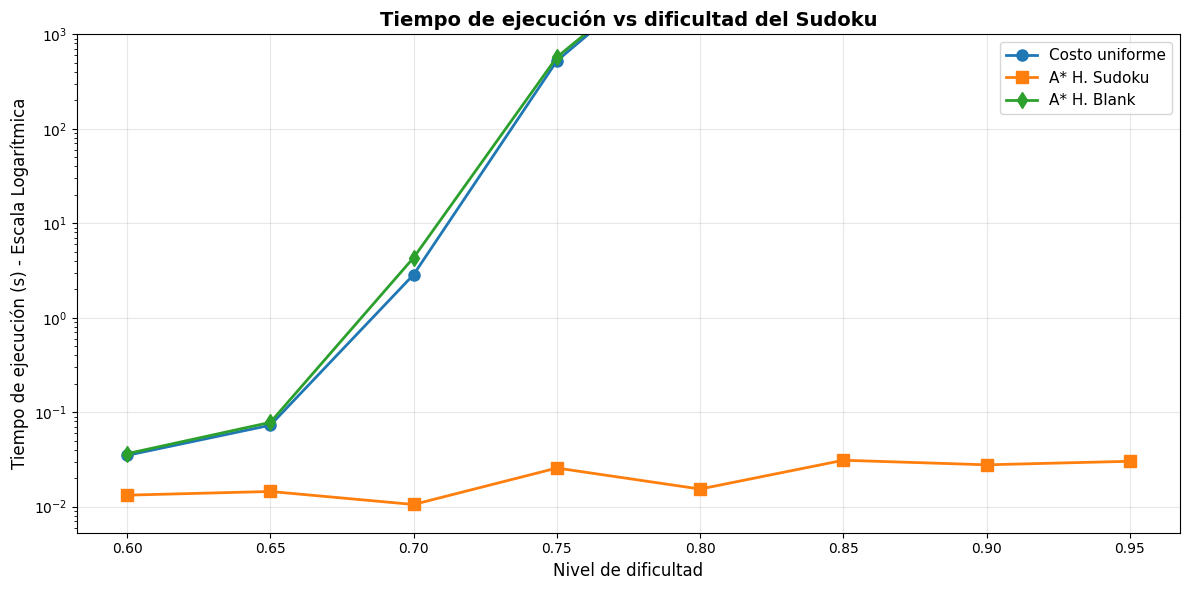

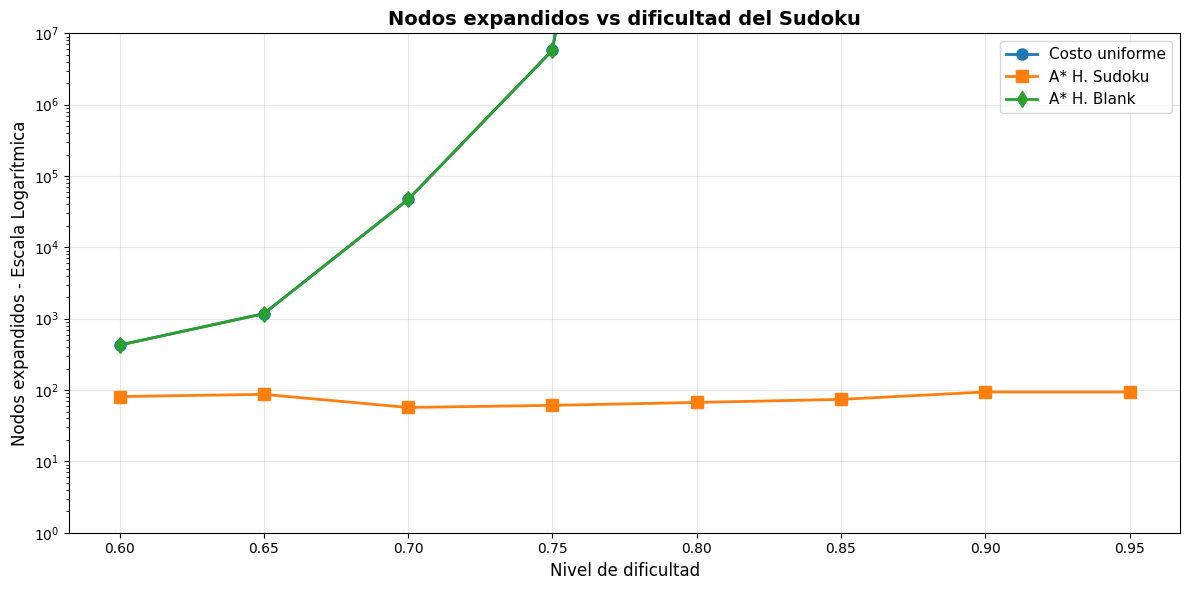

C:\Users\mateo\AppData\Local\Temp\ipykernel_24768\117449605.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0,10**3)


Gráficas guardadas como:
- comparacion_sudoku_algoritmos.png (alta resolución)
- comparacion_sudoku_algoritmos.pdf (vectorial)


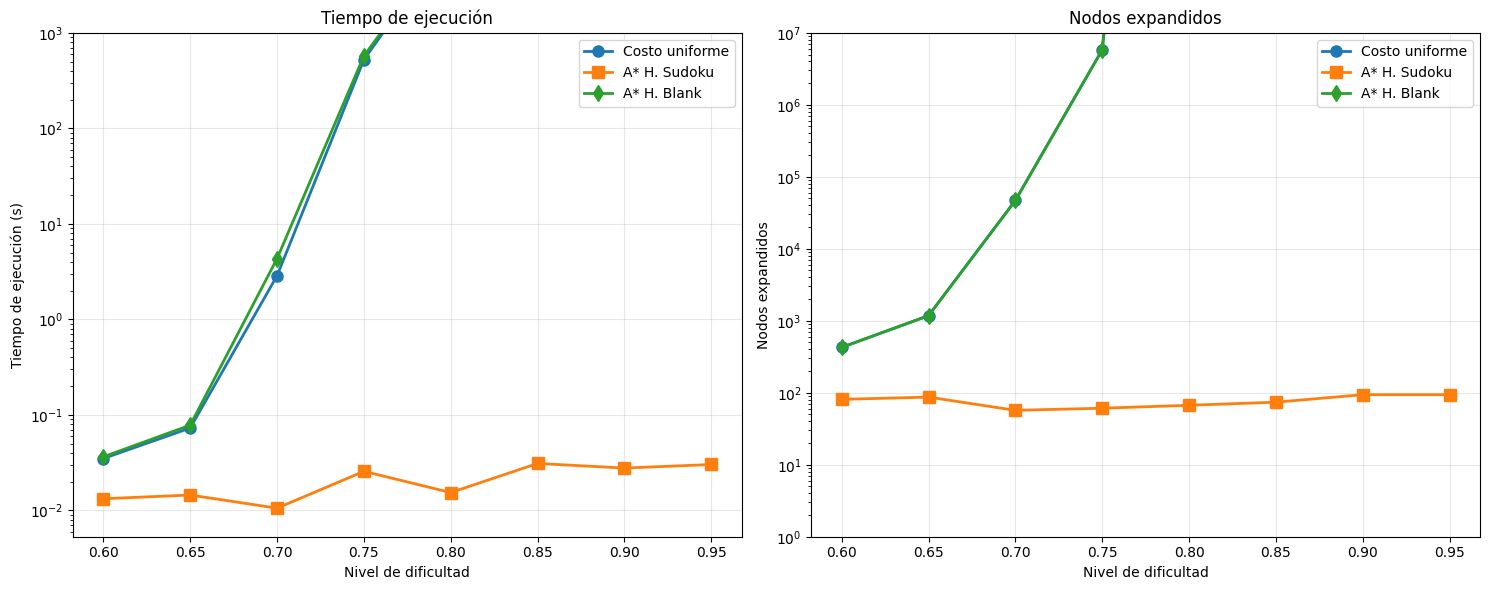

In [7]:
import matplotlib.pyplot as plt

# Niveles de dificultad usados en tu bucle
niveles_dificultad = [0.6 + (i*0.05) for i in range(8)]

# --- Gráfico de tiempos (escala logarítmica) ---
plt.figure(figsize=(12,6))
plt.semilogy(niveles_dificultad, tiemposC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
plt.semilogy(niveles_dificultad, tiemposA, marker='s', linewidth=2, markersize=8, label="A* H. Sudoku")
plt.semilogy(niveles_dificultad, tiemposBlank, marker='d', linewidth=2, markersize=8, label="A* H. Blank")
plt.xlabel("Nivel de dificultad", fontsize=12)
plt.ylabel("Tiempo de ejecución (s) - Escala Logarítmica", fontsize=12)
plt.title("Tiempo de ejecución vs dificultad del Sudoku", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(niveles_dificultad, [f'{d:.2f}' for d in niveles_dificultad])
plt.ylim(0, 10**3)
plt.tight_layout()
plt.show()

# --- Gráfico de nodos expandidos (escala logarítmica) ---
plt.figure(figsize=(12,6))
plt.semilogy(niveles_dificultad, nodosExpandidosC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
plt.semilogy(niveles_dificultad, nodosExpandidosA, marker='s', linewidth=2, markersize=8, label="A* H. Sudoku")
plt.semilogy(niveles_dificultad, nodosExpandidosBlank, marker='d', linewidth=2, markersize=8, label="A* H. Blank")
plt.xlabel("Nivel de dificultad", fontsize=12)
plt.ylabel("Nodos expandidos - Escala Logarítmica", fontsize=12)
plt.title("Nodos expandidos vs dificultad del Sudoku", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(niveles_dificultad, [f'{d:.2f}' for d in niveles_dificultad])
plt.ylim(1, 10**7)  # Límite del eje Y hasta 10^7
plt.tight_layout()
plt.show()
# --- Gráfico adicional: Comparación lado a lado ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Tiempos
ax1.semilogy(niveles_dificultad, tiemposC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
ax1.semilogy(niveles_dificultad, tiemposA, marker='s', linewidth=2, markersize=8, label="A* H. Sudoku")
ax1.semilogy(niveles_dificultad, tiemposBlank, marker='d', linewidth=2, markersize=8, label="A* H. Blank")
ax1.set_xlabel("Nivel de dificultad")
ax1.set_ylabel("Tiempo de ejecución (s)")
ax1.set_title("Tiempo de ejecución")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(niveles_dificultad)
ax1.set_xticklabels([f'{d:.2f}' for d in niveles_dificultad])
ax1.set_ylim(0,10**3)

# Nodos expandidos
ax2.semilogy(niveles_dificultad, nodosExpandidosC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
ax2.semilogy(niveles_dificultad, nodosExpandidosA, marker='s', linewidth=2, markersize=8, label="A* H. Sudoku")
ax2.semilogy(niveles_dificultad, nodosExpandidosBlank, marker='d', linewidth=2, markersize=8, label="A* H. Blank")
ax2.set_xlabel("Nivel de dificultad")
ax2.set_ylabel("Nodos expandidos")
ax2.set_title("Nodos expandidos")
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(niveles_dificultad)
ax2.set_xticklabels([f'{d:.2f}' for d in niveles_dificultad])
ax2.set_ylim(1, 10**7)

plt.tight_layout()

# Guardar la gráfica de comparación
plt.savefig('comparacion_sudoku_algoritmos.png', dpi=300, bbox_inches='tight')
plt.savefig('comparacion_sudoku_algoritmos.pdf', bbox_inches='tight')
print("Gráficas guardadas como:")
print("- comparacion_sudoku_algoritmos.png (alta resolución)")
print("- comparacion_sudoku_algoritmos.pdf (vectorial)")

plt.show()

Ahora veamos más datos entre los intervalos que parecen ser críticos para ambos algoritmos, es decir, entre el 0.7 y el 0.75. Veamos más información resultante de esto.

In [16]:
import random as rd
tiemposC=[]
tiemposA=[]
nodosExpandidosC=[]
nodosExpandidosA=[]
nodosFronteraC=[]
nodosFronteraA=[]


for i in range(101):
    dificultad = 73
    
    print("Iteración número {0} con dificultad {1} ".format(i,dificultad), end="\n")
    T = Sudoku(3,seed=int(time.time() * 1000)).difficulty(dificultad)
    T = transformar_tablero(T.board)
    problem = SudokuProblem(T)
    _, statsA = aStarSearchInstrumentado(problem,sudokuHeuristic)
    tA = statsA['tiempo_fin']-statsA['tiempo_inicio']
    tiemposA.append(tA)
    nodosExpandidosA.append(statsA['nodos_expandidos'])
    nodosFronteraA.append(statsA['nodos_en_frontera_max'])
    _, statsC = uniformCostSearchInstrumentado(problem)
    tC = statsC['tiempo_fin']-statsC['tiempo_inicio']
    tiemposC.append(tC)
    nodosExpandidosC.append(statsC['nodos_expandidos'])
    nodosFronteraC.append(statsC['nodos_en_frontera_max'])
        

Iteración número 0 con dificultad 0.73 
Iteración número 1 con dificultad 0.73 
Iteración número 2 con dificultad 0.73 
Iteración número 3 con dificultad 0.73 
Iteración número 4 con dificultad 0.73 
Iteración número 5 con dificultad 0.73 
Iteración número 6 con dificultad 0.73 
Iteración número 7 con dificultad 0.73 
Iteración número 8 con dificultad 0.73 
Iteración número 9 con dificultad 0.73 
Iteración número 10 con dificultad 0.73 
Iteración número 11 con dificultad 0.73 
Iteración número 12 con dificultad 0.73 
Iteración número 13 con dificultad 0.73 
Iteración número 14 con dificultad 0.73 
Iteración número 15 con dificultad 0.73 
Iteración número 16 con dificultad 0.73 
Iteración número 17 con dificultad 0.73 
Iteración número 18 con dificultad 0.73 
Iteración número 19 con dificultad 0.73 
Iteración número 20 con dificultad 0.73 
Iteración número 21 con dificultad 0.73 
Iteración número 22 con dificultad 0.73 
Iteración número 23 con dificultad 0.73 
Iteración número 24 con di

C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\1843555001.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])
C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\1843555001.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])
C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\1843555001.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])


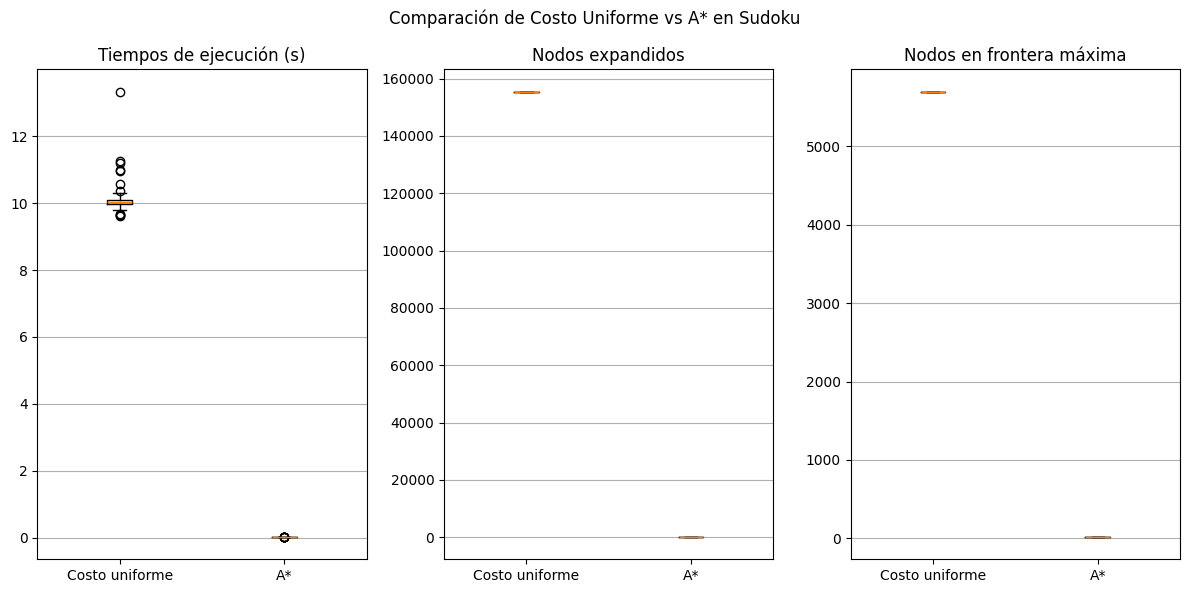

In [17]:
# Datos y etiquetas para iterar más fácil
datos = [
    (tiemposC, tiemposA, "Tiempos de ejecución (s)"),
    (nodosExpandidosC, nodosExpandidosA, "Nodos expandidos"),
    (nodosFronteraC, nodosFronteraA, "Nodos en frontera máxima")
]

plt.figure(figsize=(12, 6))

for i, (costoU, aStar, titulo) in enumerate(datos, 1):
    plt.subplot(1, 3, i)
    plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])
    plt.title(titulo)
    plt.grid(True, axis="y")

plt.suptitle("Comparación de Costo Uniforme vs A* en Sudoku")
plt.tight_layout()
plt.show()

In [19]:
promedioTiempoC = statistics.mean(tiemposC)
promedioTiempoA = statistics.mean(tiemposA)
promedioExpansionC = statistics.mean(nodosExpandidosC)
promedioExpansionA = statistics.mean(nodosExpandidosA)
promedioFronteraC = statistics.mean(nodosFronteraC)
promedioFronteraA = statistics.mean(nodosFronteraA)

print("Promedio de tiempos: Costo Uniforme:{0}, A*:{1}\n".format(promedioTiempoC,promedioTiempoA))
print("Promedio de expansión: Costo Uniforme:{0}, A*:{1}\n".format(promedioExpansionC,promedioExpansionA))
print("Promedio de nodos en frontera: Costo Uniforme:{0}, A*:{1}\n".format(promedioFronteraC,promedioFronteraA))

Promedio de tiempos: Costo Uniforme:10.102282871114145, A*:0.019450100341645796

Promedio de expansión: Costo Uniforme:155437, A*:90

Promedio de nodos en frontera: Costo Uniforme:5700, A*:17



Finalmente, vamos a analizar las soluciones producidas por A* utilizando las dos heurísticas propuestas:

In [8]:
tiemposBlank=[]
tiemposSudoku=[]
nodosExpandidosBlank=[]
nodosExpandidosSudoku=[]
nodosFronteraBlank=[]
nodosFronteraSudoku=[]

## 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1
for i in range(50):
    dificultad = 0.68
    print("Empezando iteración: ", i, end="\n")
    T = Sudoku(3).difficulty(dificultad)
    T = transformar_tablero(T.board)
    problem = SudokuProblem(T)
    _, statsS = aStarSearchInstrumentado(problem,sudokuHeuristic)
    tS = statsS['tiempo_fin']-statsS['tiempo_inicio']
    #print("Heurítisca Sudoku terminada en:",tS,end="\n")
    _, statsB = aStarSearchInstrumentado(problem,blankHeuristic)
    tB = statsB['tiempo_fin']-statsB['tiempo_inicio']
    #print("Heurística Blank terminada en:",tB,end="\n")
        
    tiemposBlank.append(tB)
    tiemposSudoku.append(tS)
    nodosExpandidosBlank.append(statsB['nodos_expandidos'])
    nodosExpandidosSudoku.append(statsS['nodos_expandidos'])
    nodosFronteraBlank.append(statsB['nodos_en_frontera_max'])
    nodosFronteraSudoku.append(statsS['nodos_en_frontera_max'])
        

Empezando iteración:  0
Empezando iteración:  1
Empezando iteración:  2
Empezando iteración:  3
Empezando iteración:  4
Empezando iteración:  5
Empezando iteración:  6
Empezando iteración:  7
Empezando iteración:  8
Empezando iteración:  9
Empezando iteración:  10
Empezando iteración:  11
Empezando iteración:  12
Empezando iteración:  13
Empezando iteración:  14
Empezando iteración:  15
Empezando iteración:  16
Empezando iteración:  17
Empezando iteración:  18
Empezando iteración:  19
Empezando iteración:  20
Empezando iteración:  21
Empezando iteración:  22
Empezando iteración:  23
Empezando iteración:  24
Empezando iteración:  25
Empezando iteración:  26
Empezando iteración:  27
Empezando iteración:  28
Empezando iteración:  29
Empezando iteración:  30
Empezando iteración:  31
Empezando iteración:  32
Empezando iteración:  33
Empezando iteración:  34
Empezando iteración:  35
Empezando iteración:  36
Empezando iteración:  37
Empezando iteración:  38
Empezando iteración:  39
Empezando 

C:\Users\mateo\AppData\Local\Temp\ipykernel_7208\3624153629.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Heurística Blank", "Heurística Sudoku"])
C:\Users\mateo\AppData\Local\Temp\ipykernel_7208\3624153629.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Heurística Blank", "Heurística Sudoku"])
C:\Users\mateo\AppData\Local\Temp\ipykernel_7208\3624153629.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Heurística Blank", "Heurística Sudoku"])


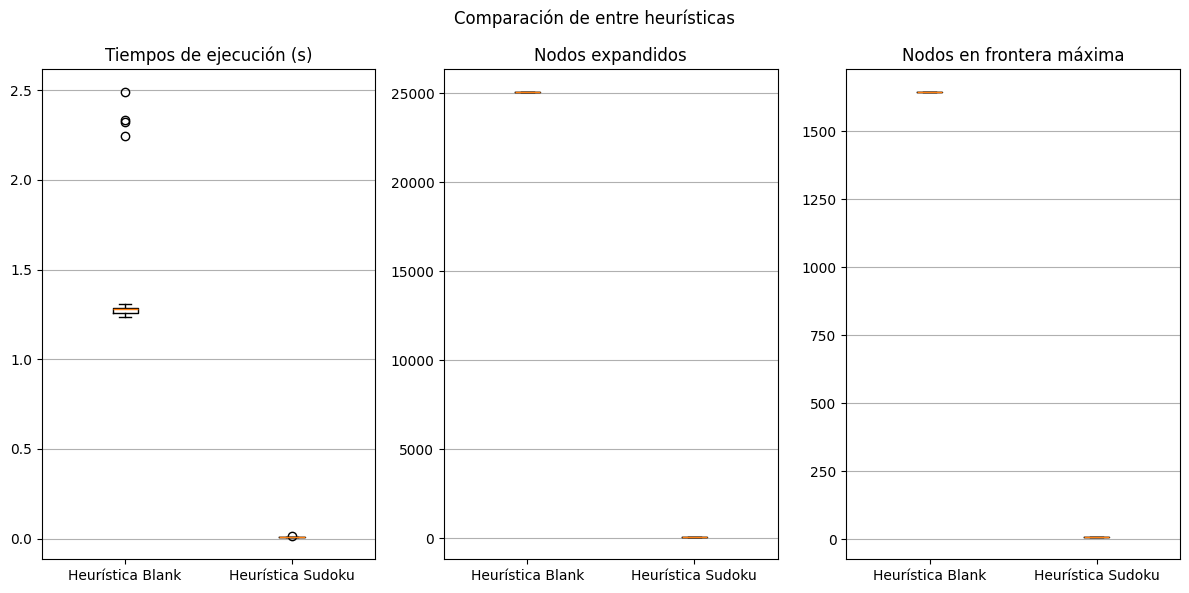

In [9]:
# Datos y etiquetas para iterar más fácil
datos = [
    (tiemposBlank, tiemposSudoku, "Tiempos de ejecución (s)"),
    (nodosExpandidosBlank, nodosExpandidosSudoku, "Nodos expandidos"),
    (nodosFronteraBlank, nodosFronteraSudoku, "Nodos en frontera máxima")
]

plt.figure(figsize=(12, 6))

for i, (costoU, aStar, titulo) in enumerate(datos, 1):
    plt.subplot(1, 3, i)
    plt.boxplot([costoU, aStar], labels=["Heurística Blank", "Heurística Sudoku"])
    plt.title(titulo)
    plt.grid(True, axis="y")

plt.suptitle("Comparación de entre heurísticas")
plt.tight_layout()
plt.show()